<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

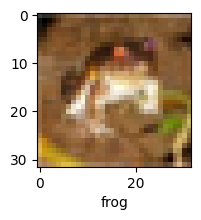

In [10]:
plot_sample(X_train, y_train, 0)

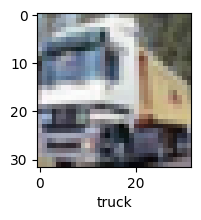

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

d:\DATA SCIENCE\PYTHON\Deep Learning\Tensor-flow\DLT\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.3061 - loss: 1.9319
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.4204 - loss: 1.6461
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.4515 - loss: 1.5545
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.4744 - loss: 1.4909
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.4952 - loss: 1.4330


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55      1000
           1       0.59      0.64      0.61      1000
           2       0.40      0.35      0.37      1000
           3       0.39      0.18      0.25      1000
           4       0.50      0.29      0.37      1000
           5       0.32      0.53      0.40      1000
           6       0.47      0.66      0.55      1000
           7       0.64      0.45      0.53      1000
           8       0.66      0.58      0.62      1000
           9       0.47      0.68      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\DATA SCIENCE\PYTHON\Deep Learning\Tensor-flow\DLT\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.3686 - loss: 1.7288
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.5755 - loss: 1.1942
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6411 - loss: 1.0340
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6678 - loss: 0.9514
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6958 - loss: 0.8749
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7163 - loss: 0.8174
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7287 - loss: 0.7816
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7480 - loss: 0.7245
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7579 - loss: 0.6955
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7680 - loss: 0.6623


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6954 - loss: 0.9138


[0.9214789867401123, 0.6966999769210815]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[8.6905324e-04, 1.0225389e-04, 9.2499601e-03, 6.6478896e-01,
        2.0355785e-03, 7.8840330e-02, 1.0756570e-02, 9.8847121e-04,
        2.3232675e-01, 4.2113734e-05],
       [1.0528971e-02, 2.7379167e-01, 1.2707590e-06, 4.2730853e-06,
        1.0031558e-06, 9.3653206e-08, 1.1128919e-08, 2.3417142e-08,
        7.0698994e-01, 8.6827371e-03],
       [1.7611999e-02, 1.2626636e-01, 4.1723051e-05, 4.6375152e-04,
        2.8663746e-05, 6.0197504e-05, 3.3976885e-06, 2.0845646e-05,
        8.5257691e-01, 2.9261289e-03],
       [9.5556521e-01, 5.5330410e-03, 2.0227175e-02, 5.8146770e-04,
        6.8270165e-04, 9.7009997e-06, 3.5227677e-05, 1.4621255e-04,
        1.7030874e-02, 1.8844467e-04],
       [3.6047280e-05, 6.6603045e-04, 5.3529624e-02, 3.0157639e-02,
        2.5714201e-01, 6.9725601e-04, 6.5758175e-01, 1.6784860e-04,
        2.1551394e-05, 2.5049525e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

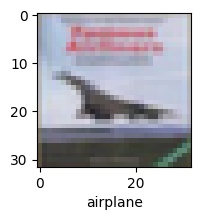

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'

<h3 style='color:purple'>Exercise</h3>

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference:
https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/16_cnn_cifar10_small_image_classification/cnn_mnist_exercise_solution.ipynb)